<a href="https://colab.research.google.com/github/anebawk/DS_Projects/blob/main/ENews_Express_Learner_Full_Code_Kwabena_Dwaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

### Problem Statement
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

#### Objectives:

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new        page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the         pandas.crosstab() function]

Is the time spent on the new page the same for the different language users?

### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Reading the Data into a DataFrame

In [ ]:
# importing the Data and reading the DataFrame
df = pd.read_csv('/Users/coby/Desktop/PGP-DSBA_Texas/Buiness statistics/Project work BS/abtest.csv.xls')

## Explore the dataset and extract insights using Exploratory Data Analysis

#### Checking the first few rows of the Dataset

In [ ]:
# Viewing the first few row of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


The dataset has loaded correctly and reflects the data dictionary provided.

#### Checking the last few rows of the Dataset

In [ ]:
# Checking the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Just as the first few rows, the last few rows also corresponds to the the data dictionary and has the same Dataframe as the first few rows.

#### Checking the Shape of the Dataset

In [ ]:
# checking the shape of the the data
df.shape

(100, 6)

The dataset has 100 rows and 6 columns.

#### Checking the data types of the columns of the dataset

In [ ]:
# checking the data types of the various columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
- The dataset consist of 2 numerical columns and 5 object type columns and a memory usage of 4.8KB

#### Checking for missing values in the dataset

In [ ]:
# checking for missing values in the data
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observations:
- There are no null values in the dataset

#### Checking the statistical summary of the variables

In [ ]:
# checking the statistical summary of the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observation
- The average time spent on a page is 5.38 minutes. The higest time spend on a landing page is 10.71 minutes         whiles the lowest time spent on a page is 0.19 minutes.
- 75% of users spend 7.02 minutes on the page.

#### Checking for Duplicates in the dataset

In [ ]:
df.duplicated().sum()

0

Observation:
- There are are duplications in the Dataset

### Univariate Analysis

#### Time spent on the page

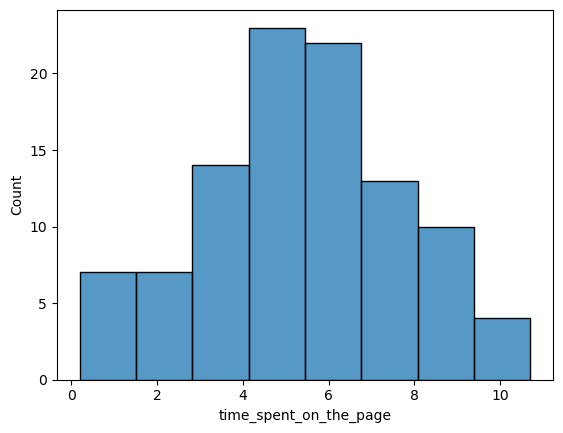

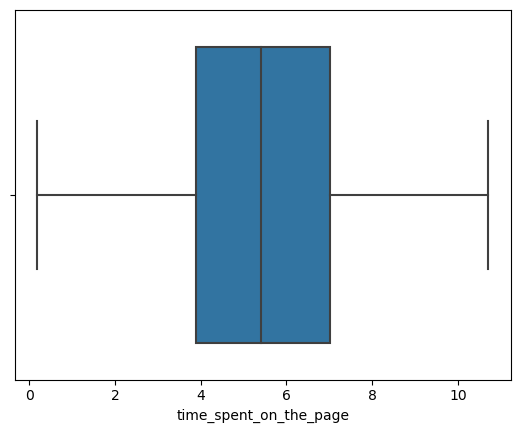

In [ ]:
# Observations on the time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page') # making a histogram for time spent on the page
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page') # making a boxplot for time spend on the page
plt.show()

Observations:
- Time spent on the page is a normal distribution
- The minimum time spent on a page is 0.2 minutes
- users who vist the page spend an average of 5.4 minuts on the page whiles the maximum time spent on the page   is about 10.7 minutes.


#### Group

In [ ]:
# checking the unique counts in group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

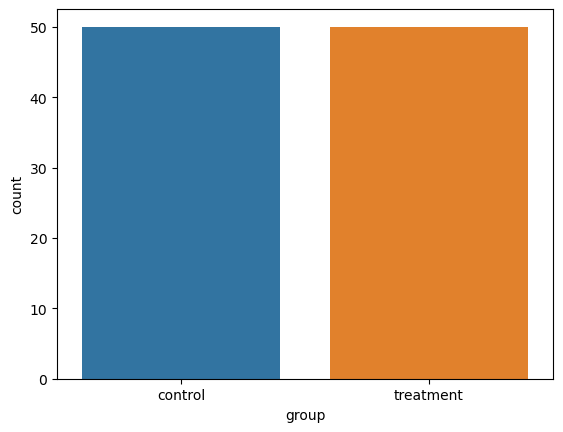

In [ ]:
 sns.countplot(data=df, x= 'group'); # making a count of group.

Observations:
- There are two uniques values in group i.e. control and treatment with each having a freequency count of 50       

#### Landing page

In [ ]:
# checking the unique value and frequency of count of Landing page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

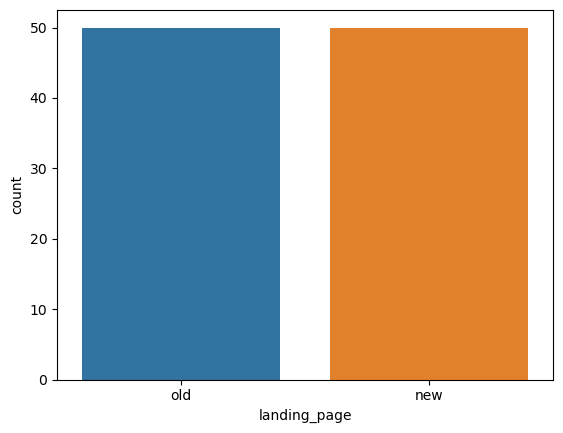

In [ ]:
# making a count plot of landing page
sns.countplot(data=df, x='landing_page');

Observations:
- Similar to Group, Landing page also contains two unique value i.e. old and new with a frequency counts of   50 each

#### Converted

In [ ]:
# Checking the unique values and frequency of count of Converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

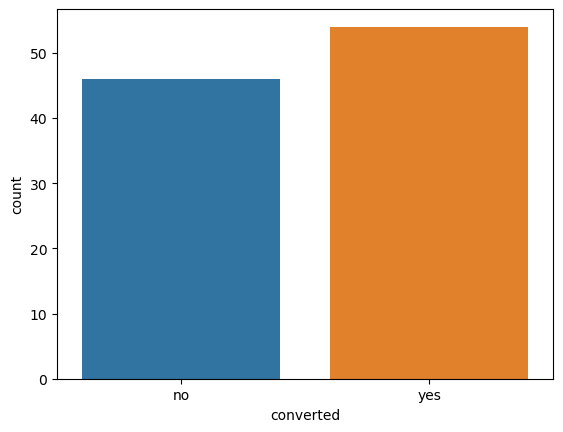

In [ ]:
sns.countplot(data=df, x='converted'); #making a countplot to visualize converted

Observation
- Out of the 100 users who visited the landing pages 54 of the them got converted whiles 46 did not

#### Language Preferred

In [ ]:
# checking the unique value and frequency of count of language preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

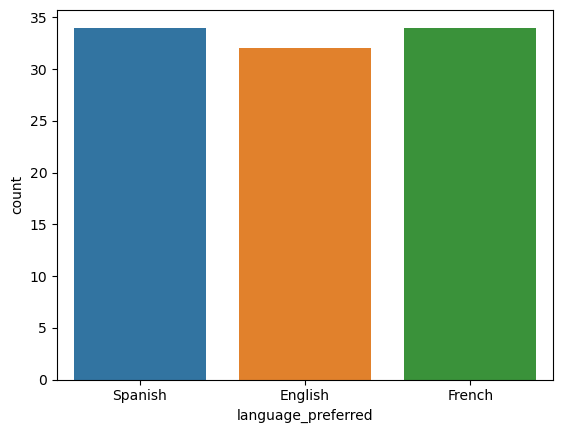

In [ ]:
# making a countplot to visualized language preferred by users
sns.countplot(data=df, x='language_preferred');

Observation:
- Out of the 100 users,34 each preferred Spanish and French whiles the remaining 32 preferred English.

### Bivariate Analysis

#### Time spent on the page vs conversion status

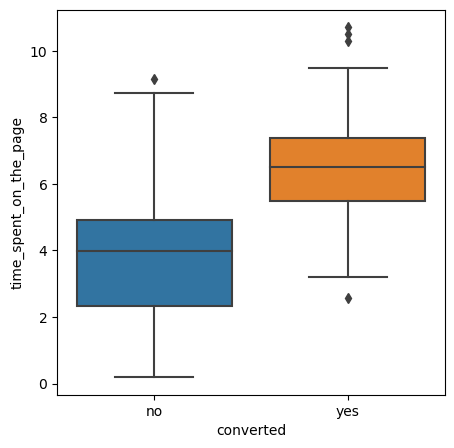

In [ ]:
# ploting a box graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x = 'converted' , y = 'time_spent_on_the_page');

Obsevations:
- 75% of users who converted spent around 7 minutes on a page.
- 50% of users who converted  spent around 6.5 minutes on a page
- 75% of users who dit not convert spent arond 5 minutes on a page.
- 50%  of users who did not convert spent around 4 minutes

#### Language preferred vs Time spent on the page

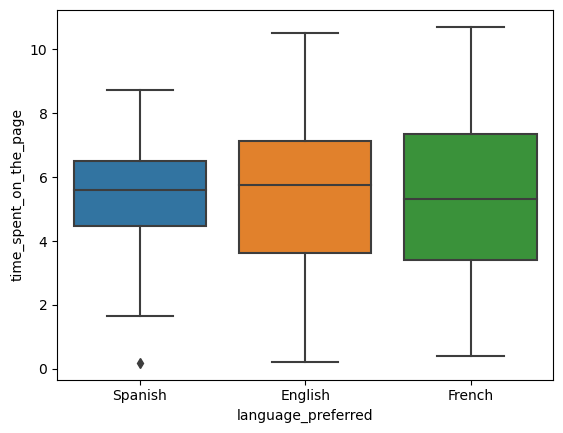

In [ ]:
# making a boxplot to visualize the relationship between 'language preferred'  and 'Time spent on the page columns
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page');

Observation
- 50% of users who prefer English spent an average 5.8 minutes on a page,
- 50% of users who prefer Spansih spent an average  5.4 minutes on a page and
- 50% of usres who prefer French spent an average  5.0 minutes on a page.

#### Landing page vs Time spent on the page

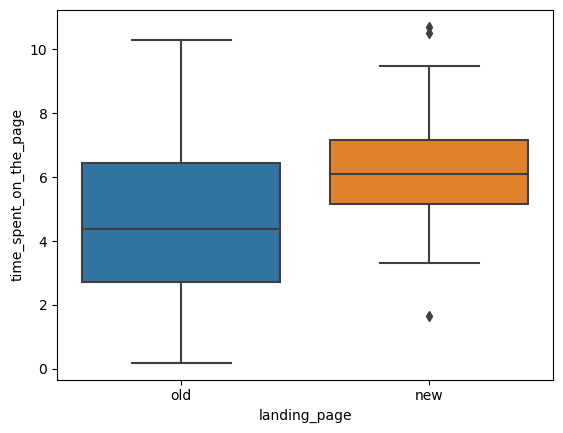

In [ ]:
# making a boxplot to visualize the relationship between 'landing page'  and 'Time spent on the page columns
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');

Observations:
- 75% of users spent 7 minutes on the new page whiles 75% of users on the old page spend around 6.2minutes.
- 50% of users spent  6.1 minutes on the new page while 50% of users on the old page spent around 4.3         minutes.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

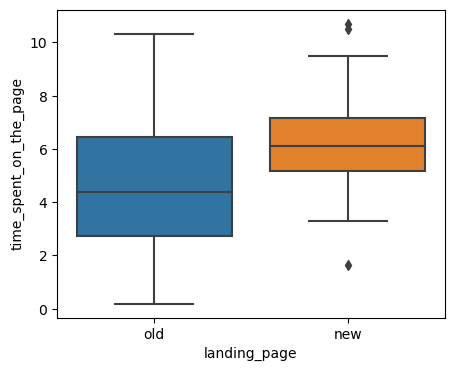

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(5,4))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $u_1$, $u_2$ be the mean time on new and old landing pages respectively

$𝐻_0$: $𝑢_1$ = $𝑢_2$

$𝐻_𝑎$: $𝑢_1$ > $𝑢_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we will use two independent sample ttest.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05.

### Step 4: Collect and prepare data

In [ ]:
# creating a new data frame for new landing page users
newpage_time_spent = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# creating a new data frame for old landing page users
oldpage_time_spent = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
# calculating the standard deviation to confirm if they are significantly unequal.
print('The sample standard deviation of the time spent on the new page is:', round(newpage_time_spent.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(oldpage_time_spent.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [ ]:
#importing the required functions
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(newpage_time_spent, oldpage_time_spent,equal_var = False, alternative ='greater')
print('The p_value is',p_value)

The p_value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# comparint the p_value with alpha
if p_value < 0.05:
    print(f'As the p-value {p_value} is lesser than the level siginificance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.0001392381225166549 is lesser than the level siginificance, we reject the null hypothesis.


### Step 7:  Draw inference

Insight:
As the p-value(0.000139) is much lesser then the level of significance we reject the null hypothesis. Hence we do have enough evidence to support the assertion that users spend more time on the new landing page than the old

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

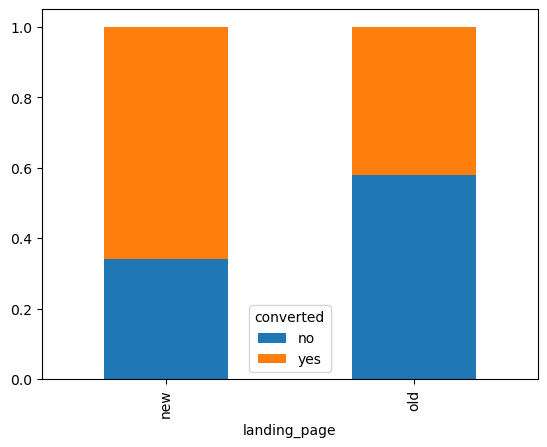

In [ ]:
# plotting to visually compare  conversion rate for the old and new landing pages
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked=True);

### Step 1: Define the null and  alternate Hypothesis

Let $P_1$, $P_2$ be the mean conversion rate for old and new landing pages respectively

$𝐻_0$: $P_1$ = $P_2$

$𝐻_𝑎$: $P_1$ < $P_2$

### Step 2: Select the Appropriate test

This is a one-tailed, two population proportions from two independent population test, therefore we will use ztest

### Step 3: Deciding the significance level

the level is significance $\alpha$ is given as 0.05

### Step 4: Collect and prepare the data

In [ ]:
# Calculate the converted users in the treatment group
new_converted = df[df['group']=='treatment']['converted'].value_counts()['yes']
# calculate the converted users in the control group
old_converted = df[df['group']=='control']['converted'].value_counts()['yes']
# total number of user in the control group
total_no_control = df.group.value_counts()['control']
# total number of use in the treatment group
total_no_treatment = df.group.value_counts()['treatment']

In [ ]:
print('The number of user served on the new and old pages are {0} and {1} respectively'.format(total_no_control, total_no_treatment))

The number of user served on the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest
# calculate the p-value
test_stats, p_value = proportions_ztest([new_converted, old_converted],[total_no_control,total_no_treatment], alternative = 'smaller')
p_value

0.9919736917959437

### Step 6 : Compare the p-value with $\alpha$

In [ ]:
# comparing the p-value to the level of significance
if p_value < 0.05:
    print(f'As the p-value {p_value} is lesser the level of significance we reject the Null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater the level of significance we fail to reject the Null hypothesis.')

As the p-value 0.9919736917959437 is greater the level of significance we fail to reject the Null hypothesis.


### Step 7:  Draw inference

Insight:
- As the p-value is greater than the level of significance, we fail to reject the null hypothesis. Hence there is   not enough statistical evidence to conclude that the conversion rate of the new page is greater than old page

## 3. Is the conversion and preferred language are independent or related?

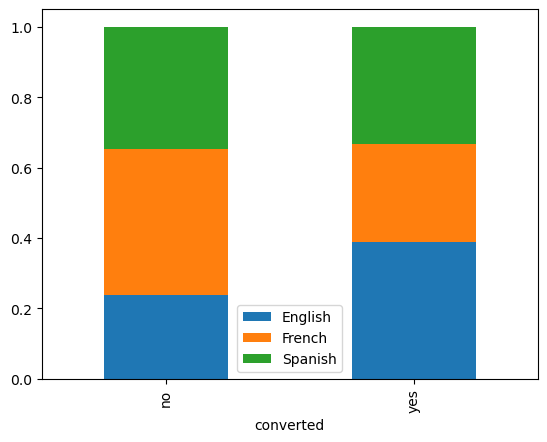

In [ ]:
### Perform Visual Analysis
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind='bar',stacked=True)
plt.legend();

### Step 1: Defining the null and alternate hypothesis

$H_o$: converted status is dependant on preferred language

$H_a$: converted status is not dependant on preferred language

### Step 2:  Select Appropriate test

- This is a problem of the test of independence, concerning two categorical variable- converted status and           preferred language. Therefore we will use chi2 contingency()

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
# create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculating the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency
# calculate the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.21298887487543447

### Step 6: Compare with p-value with $\alpha$

In [ ]:
# generate conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference

As the P-value is much greater than the level of significance we fail to reject the null hyppothesis, hence we do have enough statistical significance to conclude that converted status depends on language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

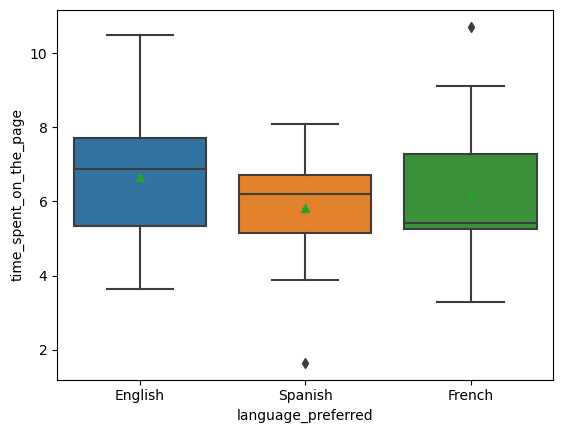

In [ ]:
# create a new DataFrame for user served on the new page
df_new = df[df['landing_page']== 'new']

# creating a boxplot to visualized the time spent on the new page for different language users
sns.boxplot(data = df_new, x='language_preferred',y = 'time_spent_on_the_page', showmeans=True);

In [ ]:
#calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and the alternate hypothesis

$H_0$: Time spent on the new page are same for all languages
    
$H_a$: At least time spent on the new page for one language is different

### Step 2: Select the Appropiate test

This is a problem concerning three population means. we will use f_oneway ANOVA test.

### Step 3: Decide the significance level

As given in the problem statement we select $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
# creat a new dataframe of time spent on the new page by English user
time_spent_by_English = df_new[df_new['language_preferred']== 'English']['time_spent_on_the_page']
# creat a new dataframe of time spent on the new page by French user
time_spent_by_French = df_new[df_new['language_preferred']== 'French']['time_spent_on_the_page']
# creat a new dataframe of time spent on the new page by Spanish user
time_spent_by_Spanish = df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_by_English,time_spent_by_French,time_spent_by_Spanish)
p_value

0.43204138694325955

### Step 6: Compare p-value with $\alpha$

In [ ]:
# generate conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

As the p_value is greater the level of significance we fail to reject the null hypothesis hence we do have enough statistical significance to conclude that time spend on the new page is almost the same for all languages.

## Conclusion and Business Recommendations

- From the sample data, we observed that
    - The average time spent on E-New Express' page is 5.38 minutes
    - out of the 100 users sample 54% were converted after visting a landing page
    - The more time a customer spends on a page the higher the likelihood of conversion as 75% of users who were         converted spent almost 7 minutes on a page.
    - 50% of users who preferred english language spent 5.8 minutes on a page, which is the highest among the           three language preferences.
- There is enough statistical evidence (p-value 0.000139 at 5% level of significance) to conclude that  users       spend more time on E-new Express' new landing page than the old.
- There is not enough statistical evidence (p-value of 0.9918 at 5% level of significance) to conclude that the     proportion of users get converted on the new page is greater than old page.
- As the P-value(0.2129) is much greater than the level of significance(5%) we do have enough statistical           significance to conclude that converted status depends on language preferred.
- As the p_value(0.4320 is greater the level of significance(5%) we do have enough statistical significance to       conclude that time spend on the new page is almost the same for all languages.
- For E-news Express to achieve the desired conversion rate on the new page, it should add features that will       retain users for a longer period on the page since most people who got converted spent longer time on the         page.
